In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading dataset hosted.
url = "https://raw.githubusercontent.com/sebinsabu/DataStore/main/adni.csv";
df1 = pd.read_csv(url)
print(df1)

     DIAGNOSIS   AGE PTGENDER  PTEDUCAT         PTETHCAT       PTRACCAT  \
0           CN  74.3     Male        16  Not Hisp/Latino          White   
1     Dementia  81.3     Male        18  Not Hisp/Latino          White   
2          MCI  67.5     Male        10      Hisp/Latino          White   
3           CN  73.7     Male        16  Not Hisp/Latino          White   
4          MCI  80.4   Female        13  Not Hisp/Latino          White   
5     Dementia  75.4     Male        10      Hisp/Latino  More than one   
6           CN  84.5   Female        18  Not Hisp/Latino          White   
7     Dementia  73.9   Female        12  Not Hisp/Latino          White   
8           CN  78.5   Female        12      Hisp/Latino          White   
9           CN  80.8     Male        18  Not Hisp/Latino          White   
10          CN  65.4     Male         9  Not Hisp/Latino          Black   
11          CN  73.1   Female        18  Not Hisp/Latino          White   
12          CN  72.6   Fe

In [4]:
#descriptive of dataset
df1.describe()

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PIB.bl,AV45.bl
count,1851.000000,1851.000000,1846.000000,1836.000000,1850.000000,1851.000000,1843.000000,1843.000000,1843.000000,1837.000000,...,1013.000000,981.000000,1002.000000,1021.000000,1215.000000,1215.000000,1215.000000,1301.000000,20.000000,891.000000
mean,73.603944,15.947596,10.792156,16.808448,5.184324,27.278768,35.772653,4.277265,4.300054,57.382509,...,1.547038,1.637802,1.812542,1.677406,980.085021,287.027086,27.641152,1.233852,1.698375,1.211917
std,7.199413,2.828228,6.539005,9.433675,2.944607,2.665917,12.641034,2.779961,2.500496,34.578994,...,0.771411,0.848796,0.907289,0.719877,457.557491,132.813700,14.603251,0.154266,0.372302,0.227395
min,54.400000,4.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-8.000000,-9.000000,-100.000000,...,1.000000,1.000000,1.000000,1.000000,199.000000,79.000000,7.000000,0.697264,1.155000,0.838537
25%,69.000000,14.000000,6.000000,10.000000,3.000000,26.000000,26.000000,2.000000,3.000000,28.571429,...,1.000000,1.000000,1.000000,1.108108,596.150000,193.350000,17.350000,1.141442,1.361875,1.020809
50%,73.600000,16.000000,9.330000,15.000000,5.000000,28.000000,35.000000,4.000000,4.000000,57.142857,...,1.200000,1.200000,1.500000,1.384615,854.200000,257.800000,24.150000,1.245474,1.743750,1.136146
75%,78.700000,18.000000,14.000000,22.330000,8.000000,29.000000,45.000000,6.000000,6.000000,100.000000,...,1.800000,2.000000,2.250000,2.051282,1395.500000,349.700000,33.975000,1.336828,1.956250,1.390537
max,91.400000,20.000000,42.670000,54.670000,10.000000,30.000000,71.000000,12.000000,15.000000,100.000000,...,4.000000,4.000000,4.000000,3.948718,1701.000000,1301.000000,121.000000,1.707168,2.282500,2.025560


In [5]:
# Counting the percentage of null values.
countofnullvalues = df1.isna().sum()
lengthofvalues    = df1.count()

# Counting the number of rows in the dataframe
index          = df1.index
number_of_rows = len(index)
print("number of rows: ",number_of_rows)

percentageofnullvalues = (countofnullvalues/number_of_rows)*100
nullvaluepercentage    = pd.DataFrame({'ColName':percentageofnullvalues.index,'NullValuepercent':percentageofnullvalues.values})

print("\n Percentage of null values for each column(%)\n\n",percentageofnullvalues)

number of rows:  1851

 Percentage of null values for each column(%)

 DIAGNOSIS                    0.000000
AGE                          0.000000
PTGENDER                     0.000000
PTEDUCAT                     0.000000
PTETHCAT                     0.000000
PTRACCAT                     0.000000
PTMARRY                      0.000000
ADAS11.bl                    0.270124
ADAS13.bl                    0.810373
ADASQ4.bl                    0.054025
MMSE.bl                      0.000000
RAVLT.immediate.bl           0.432199
RAVLT.learning.bl            0.432199
RAVLT.forgetting.bl          0.432199
RAVLT.perc.forgetting.bl     0.756348
LDELTOTAL.bl                 0.162075
DIGITSCOR.bl                56.023771
TRABSCOR.bl                  2.593193
FAQ.bl                       0.324149
mPACCdigit.bl                0.054025
mPACCtrailsB.bl              0.054025
IMAGEUID.bl                  7.293355
Ventricles.bl               10.858995
Hippocampus.bl              19.773096
WholeBrain.bl    

In [6]:
filtereddata = nullvaluepercentage.loc[nullvaluepercentage['NullValuepercent'] <= 50]
print("\n parameters having null values less than 50 percentage of total entries \n")
print(filtereddata)


 parameters having null values less than 50 percentage of total entries 

                     ColName  NullValuepercent
0                  DIAGNOSIS          0.000000
1                        AGE          0.000000
2                   PTGENDER          0.000000
3                   PTEDUCAT          0.000000
4                   PTETHCAT          0.000000
5                   PTRACCAT          0.000000
6                    PTMARRY          0.000000
7                  ADAS11.bl          0.270124
8                  ADAS13.bl          0.810373
9                  ADASQ4.bl          0.054025
10                   MMSE.bl          0.000000
11        RAVLT.immediate.bl          0.432199
12         RAVLT.learning.bl          0.432199
13       RAVLT.forgetting.bl          0.432199
14  RAVLT.perc.forgetting.bl          0.756348
15              LDELTOTAL.bl          0.162075
17               TRABSCOR.bl          2.593193
18                    FAQ.bl          0.324149
19             mPACCdigit.bl    

In [7]:
# Avoiding the entries with null values more than 50 percentage.
df2 = df1[filtereddata['ColName']].copy()

#Mapping features with categories to numerical. 

df2['PTGENDER'].replace({'Female': 1, 'Male': 2}, inplace= True)
df2['PTETHCAT'].replace({'Not Hisp/Latino': 1, 'Hisp/Latino': 2, 'Unknown':3}, inplace= True)
df2['PTMARRY'].replace({'Married': 1, 'Widowed': 2, 'Divorced':3, 'Never married':4, 'Unknown':5}, inplace= True)
df2['PTRACCAT'].replace({'White': 1, 'More than one': 2, 'Black':3, 'Asian':4, 'Unknown':5, 'Hawaiian/Other PI':6,'Am Indian/Alaskan':7}, inplace= True)
df2['DIAGNOSIS'].replace({'CN': 0, 'Dementia': 1, 'MCI':2}, inplace= True)

# Removed two columns from the analysis; due to the inference from statistical analysis.
del df2['PTETHCAT']
del df2['PTRACCAT']



xticklabels = ['CN','Dementia','MCI'] 

In [8]:
#Data stratification.
train,test = train_test_split(df2, test_size=0.25, random_state=0, stratify=df2['DIAGNOSIS']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[1:47]]
test_X  = test[test.columns[1:47]]

train_Y = train['DIAGNOSIS']
test_Y  = test['DIAGNOSIS']

# Data imputation 
#  replaced null values of train and test dataset with corresponding means in the train dataset.

meanofparameters = train_X.mean(skipna = True)
train_X          = train_X.fillna(meanofparameters)
test_X           = test_X.fillna(meanofparameters)

# Building and evaluating predictive models.

In [9]:
# Decision Tree.
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('Mean Accuracy: ', np.mean(scores))

acuracy on the 5 folds [0.84532374 0.84892086 0.82374101 0.87364621 0.83393502]
Mean Accuracy:  0.8451133677895231


In [10]:
dt.max_depth = 4
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 5 folds of CV [0.84892086 0.85251799 0.8381295  0.8700361  0.85920578]
and their mean 0.8537620445160117


In [11]:
# changing hyperparameters.
dt.max_depth       = 5
dt.criterion       = 'entropy'  # by default the criterion for split is gini impurity; we change it to entropy
min_samples_split  = 10 
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds of CV', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds of CV [0.83453237 0.87410072 0.88129496 0.87725632 0.87364621]
and their mean 0.8681661169259538


In [12]:
# Running grid search for parameter tuning
param_grid = [
     {'max_depth': [2, 3, 4, 5, 6, 7, 8]} ]

grid_search = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(criterion='entropy', max_depth=4)


0.8090850063631405 {'max_depth': 2}
0.8407916266264965 {'max_depth': 3}
0.8667454484066177 {'max_depth': 4}
0.8645663974235773 {'max_depth': 5}
0.866010440744877 {'max_depth': 6}
0.8588032101394697 {'max_depth': 7}
0.845100381788432 {'max_depth': 8}


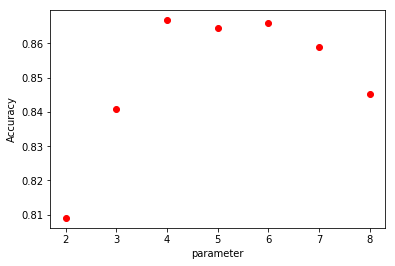

In [13]:
# display performances per each repetition of cross validation

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)
    plt.plot(params['max_depth'],np.mean(mean_score),  'ro-')
plt.xlabel('parameter')
plt.ylabel('Accuracy')
plt.show()

confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[131   0  23]
 [  0  48  39]
 [  5   1 216]]

 accuracy 0.8531317494600432

 precision 0.8531317494600432

 recall (sensitivity) 0.8531317494600432

 f1 0.8531317494600432

 accuracy from confusion matrix 1.0

 precision from confusion matrix 1.0

 recall (sensitivity) from confusion matrix 1.0

 specificity from confusion matrix 1.0


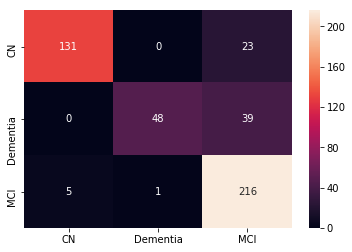

In [14]:
#Running the model with parameters from gridsearch on our Test Data.
best_dt   = grid_search.best_estimator_
pred_Y    = best_dt.predict(test_X)

cm        = confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y, average='micro'))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y, average='micro'))
print('\n f1', f1_score(test_Y, pred_Y, average='micro'))

# alternatively, they can also be computed from the confusion matrix, accoding to the lecture slides:

print('\n accuracy from confusion matrix', (cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+ cm[1,1]))
print('\n precision from confusion matrix', (cm[1,1]) / (cm[0,1]+cm[1,1]))
print('\n recall (sensitivity) from confusion matrix', (cm[1,1]) / (cm[1,0]+cm[1,1]))
print('\n specificity from confusion matrix', (cm[0,0]) / (cm[0,1]+cm[0,0]))

# Adding a confusion matrix visualisation plug in.
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

#Bagging Classifier

In [15]:
bg       = BaggingClassifier(DecisionTreeClassifier())
scores   = cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('Accuracy on the 5 folds', scores)
print('Mean Accuracy: ', np.mean(scores))

Accuracy on the 5 folds [0.86690647 0.8705036  0.89928058 0.88808664 0.85559567]
Mean Accuracy:  0.8760745915902657


In [16]:
# with a large numbe of estimators we usually get a stable good bagging model; here we evaluate it in cross validation.
bg.n_estimators  = 50 # by default 10 estimators (trees) are used
scores           = cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('Accuracy on the 5 folds', scores)
print('Mean Accuracy: ', np.mean(scores))

Accuracy on the 5 folds [0.8705036  0.86330935 0.9028777  0.90613718 0.88086643]
Mean Accuracy:  0.8847388515180634


confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[135   0  19]
 [  0  66  21]
 [ 14   8 200]]

 accuracy 0.8660907127429806

 precision 0.8660907127429806

 recall (sensitivity) 0.8660907127429806

 f1 0.8660907127429806


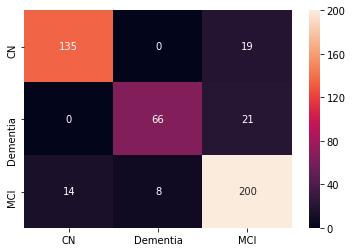

In [17]:
bg.fit(train_X, train_Y)
pred_Y=bg.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y,average='micro'))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y,average='micro'))
print('\n f1', f1_score(test_Y, pred_Y,average='micro'))

# Adding a confusion matrix visualisation plug in.
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

#Random Forest Classifier

In [18]:
rf=RandomForestClassifier()
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.8381295  0.85971223 0.87410072 0.88808664 0.88447653]
and their mean 0.8689011245876944


In [19]:
rf.max_features = 7     #sqr root of features
rf.n_estimators = 1000 
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.84892086 0.85971223 0.87410072 0.90613718 0.88808664]
and their mean 0.8753915279328883


In [20]:
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 2000, num = 10)]
param_grid = [
     {'max_features': ['auto','sqrt']},
     {'n_estimators': n_estimators} ]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'n_estimators': 1533}
best estimator RandomForestClassifier(max_features=7, n_estimators=1533)
0.8689037217879125 {'max_features': 'auto'}
0.8674700672674855 {'max_features': 'sqrt'}
0.8753941251331065 {'n_estimators': 600}
0.8746747006726748 {'n_estimators': 755}
0.8746747006726748 {'n_estimators': 911}
0.8732280601511571 {'n_estimators': 1066}
0.87611095239332 {'n_estimators': 1222}
0.8746695062722385 {'n_estimators': 1377}
0.8761135495935382 {'n_estimators': 1533}
0.8689141105887852 {'n_estimators': 1688}
0.8732306573513752 {'n_estimators': 1844}
0.8732280601511571 {'n_estimators': 2000}


confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[137   0  17]
 [  0  65  22]
 [ 10   3 209]]

 accuracy 0.8876889848812095

 precision 0.8876889848812095

 recall (sensitivity) 0.8876889848812095

 f1 0.8876889848812095


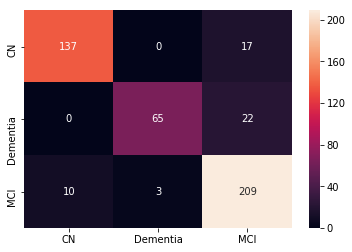

In [21]:
# evaluate best model from the grid on the test set

best_rf=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y,average='micro'))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y,average='micro'))
print('\n f1', f1_score(test_Y, pred_Y,average='micro'))
# Adding a confusion matrix visualisation plug in.
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

#ADA Boost Classifier

In [22]:
ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.8381295  0.85611511 0.87769784 0.90252708 0.88447653]
and their mean 0.8717892112302937


In [23]:
ab.n_estimators=200
ab.learning_rate=0.5
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.84172662 0.85971223 0.88489209 0.90613718 0.88086643]
and their mean 0.8746669090720204


In [24]:
param_grid = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.001,0.005,0.008,0.01]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)
    

best parameter values {'learning_rate': 0.008, 'n_estimators': 120}
best estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.008, n_estimators=120)
0.8105316468846585 {'learning_rate': 0.001, 'n_estimators': 10}
0.8105316468846585 {'learning_rate': 0.001, 'n_estimators': 20}
0.8134197335272576 {'learning_rate': 0.001, 'n_estimators': 30}
0.8134197335272576 {'learning_rate': 0.001, 'n_estimators': 40}
0.8134197335272576 {'learning_rate': 0.001, 'n_estimators': 50}
0.8141365607874711 {'learning_rate': 0.001, 'n_estimators': 60}
0.8220787990546192 {'learning_rate': 0.001, 'n_estimators': 70}
0.8256759213567774 {'learning_rate': 0.001, 'n_estimators': 80}
0.8213437913928784 {'learning_rate': 0.001, 'n_estimators': 90}
0.8235098563748279 {'learning_rate': 0.001, 'n_estimators': 100}
0.8285640079993767 {'learning_rate': 0.001, 'n_estimators': 110}
0.8285640079993767 {'learning_rate': 0.001, 'n_estimators': 120}
0.832168921902189

confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[137   0  17]
 [  0  65  22]
 [ 10   3 209]]

 accuracy 0.8876889848812095

 precision 0.8876889848812095

 recall (sensitivity) 0.8876889848812095

 f1 0.8876889848812095


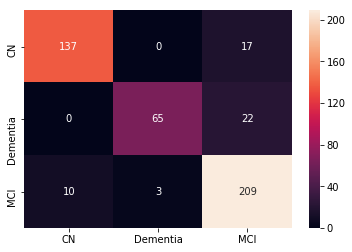

In [25]:
best_ab=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y,average='micro'))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y,average='micro'))
print('\n f1', f1_score(test_Y, pred_Y,average='micro'))
# Adding a confusion matrix visualisation plug in.
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

#  (2.b) CN vs. Dementia; 

In [26]:
# Running the analyses for classifying (CN) vs (Dementia)
# Removing cases with diagnostics of MCI _ 2.
df3 = df2.loc[df2['DIAGNOSIS'] != 2].copy()
df3.describe()

,DIAGNOSIS,AGE,PTGENDER,PTEDUCAT,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,...,EcogSPLang.bl,EcogSPVisspat.bl,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl
count,965.000000,965.000000,965.000000,965.000000,965.000000,961.000000,954.000000,964.000000,965.000000,958.000000,...,535.000000,529.000000,530.000000,520.000000,527.000000,535.000000,598.000000,598.000000,598.000000,637.000000
mean,0.360622,74.122902,1.491192,15.986528,1.448705,11.228585,16.998606,4.889004,26.972021,37.141962,...,1.523112,1.456729,1.546132,1.640673,1.743201,1.632959,1001.065552,286.948043,27.430836,1.220888
std,0.480430,6.751212,0.500182,2.827478,0.856214,7.934275,11.374172,3.275689,3.233038,14.129743,...,0.763670,0.776271,0.849922,0.925348,0.981649,0.812644,478.304409,130.861812,14.150128,0.172176
min,0.000000,55.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,199.000000,79.000000,7.000000,0.697264
25%,0.000000,69.900000,1.000000,14.000000,1.000000,5.330000,8.330000,2.000000,25.000000,26.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.026316,578.475000,194.375000,17.290000,1.118772
50%,0.000000,73.900000,1.000000,16.000000,1.000000,9.000000,13.000000,4.000000,29.000000,38.000000,...,1.111111,1.000000,1.000000,1.000000,1.250000,1.216216,875.800000,260.950000,24.195000,1.242320
75%,1.000000,78.600000,2.000000,18.000000,2.000000,16.000000,25.330000,8.000000,30.000000,48.000000,...,1.777778,1.571429,1.800000,2.000000,2.000000,2.013158,1478.500000,354.375000,33.592500,1.338230
max,1.000000,90.900000,2.000000,20.000000,5.000000,42.670000,54.670000,10.000000,30.000000,71.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.948718,1701.000000,851.600000,94.860000,1.673384


In [27]:
#Data stratification.
train,test = train_test_split(df3, test_size=0.25, random_state=0, stratify=df3['DIAGNOSIS']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[1:47]]
test_X  = test[test.columns[1:47]]

train_Y = train['DIAGNOSIS']
test_Y  = test['DIAGNOSIS']

# Data imputation 
#  replaced null values of train and test dataset with corresponding means in the train dataset.

meanofparameters = train_X.mean(skipna = True)
train_X          = train_X.fillna(meanofparameters)
test_X           = test_X.fillna(meanofparameters)

acuracy on the 5 folds [0.9862069  0.9862069  0.9862069  0.99305556 0.99305556]
and their mean 0.9889463601532567
{4} acuracy on the 5 folds of CV [0.9862069  0.97931034 0.9862069  0.96527778 0.99305556]
and their mean 0.9820114942528735

 Results after grid search 

best parameter values {'max_depth': 3}
best estimator DecisionTreeClassifier(max_depth=3)
confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns 
 [[155   0]
 [  2  85]]

 accuracy 0.9917355371900827

 precision 1.0

 recall (sensitivity) 0.9770114942528736

 f1 0.9883720930232558

 accuracy from confusion matrix 0.9917355371900827

 precision from confusion matrix 1.0

 recall (sensitivity) from confusion matrix 0.9770114942528736

 specificity from confusion matrix 1.0


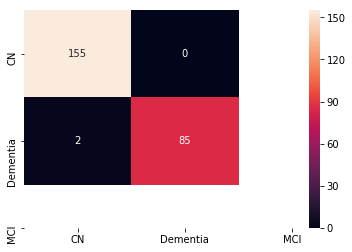

In [28]:
#Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

dt.max_depth = 4
scores = cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('{4} acuracy on the 5 folds of CV', scores)
print('and their mean', np.mean(scores))

print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

#Grid search
param_grid = [
     {'max_depth': [2, 3, 4, 5, 6, 7, 8]} ]

grid_search = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
best_dt=grid_search.best_estimator_
pred_Y=best_dt.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

# alternatively, they can also be computed from the confusion matrix, accoding to the lecture slides:

print( '\n accuracy from confusion matrix', (cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+ cm[1,1]) )
print( '\n precision from confusion matrix', (cm[1,1]) / (cm[0,1]+cm[1,1]) )
print( '\n recall (sensitivity) from confusion matrix', (cm[1,1]) / (cm[1,0]+cm[1,1]) )
print( '\n specificity from confusion matrix', (cm[0,0]) / (cm[0,1]+cm[0,0]) )
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.99310345 0.9862069  0.99310345 0.99305556 0.99305556]
and their mean 0.9917049808429118
for n_estimators 100;acuracy on the 5 folds [0.9862069  0.9862069  0.99310345 1.         1.        ]
and their mean 0.993103448275862
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[154   1]
 [  1  86]]

 accuracy 0.9917355371900827

 precision 0.9885057471264368

 recall (sensitivity) 0.9885057471264368

 f1 0.9885057471264368


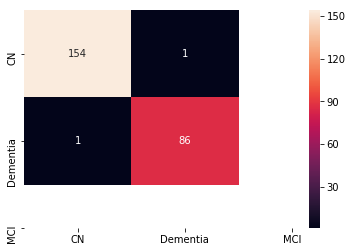

In [29]:
#Bagging.
bg=BaggingClassifier(DecisionTreeClassifier())
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.n_estimators=100 # by default 10 estimators (trees) are used
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators 100;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.fit(train_X, train_Y)
pred_Y=bg.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.9862069  0.99310345 0.99310345 1.         1.        ]
and their mean 0.9944827586206897
for max_features 7 and n_estimators 1000;acuracy on the 5 folds [0.99310345 0.99310345 0.99310345 1.         1.        ]
and their mean 0.9958620689655172
best parameter values {'max_features': 'auto'}
best estimator RandomForestClassifier(n_estimators=1000)

 Results after grid search 

0.9958620689655172 {'max_features': 'auto'}
0.9958620689655172 {'max_features': 'sqrt'}
0.9958620689655172 {'n_estimators': 600}
0.9944827586206897 {'n_estimators': 755}
0.9958620689655172 {'n_estimators': 911}
0.9958620689655172 {'n_estimators': 1066}
0.9958620689655172 {'n_estimators': 1222}
0.9958620689655172 {'n_estimators': 1377}
0.9958620689655172 {'n_estimators': 1533}
0.9958620689655172 {'n_estimators': 1688}
0.9958620689655172 {'n_estimators': 1844}
0.9958620689655172 {'n_estimators': 2000}
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on colu

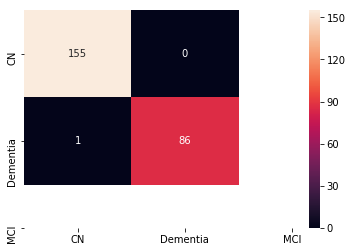

In [30]:
#RandomForests.
rf=RandomForestClassifier()
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

rf.max_features = 7
rf.n_estimators = 1000
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for max_features 7 and n_estimators 1000;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

#grid search.
param_grid = [
     {'max_features': ['auto','sqrt']},
     {'n_estimators': n_estimators} ]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best_rf=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)
cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.99310345 0.99310345 0.99310345 1.         1.        ]
and their mean 0.9958620689655172
for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds [0.99310345 0.99310345 0.99310345 1.         1.        ]
and their mean 0.9958620689655172

 Results after grid search 

best parameter values {'learning_rate': 0.5, 'n_estimators': 20}
best estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=20)
0.9889367816091955 {'learning_rate': 0.01, 'n_estimators': 10}
0.9889367816091955 {'learning_rate': 0.01, 'n_estimators': 20}
0.9861685823754789 {'learning_rate': 0.01, 'n_estimators': 30}
0.9889367816091955 {'learning_rate': 0.01, 'n_estimators': 40}
0.9889367816091955 {'learning_rate': 0.01, 'n_estimators': 50}
0.9889367816091955 {'learning_rate': 0.01, 'n_estimators': 60}
0.9875574712643678 {'learning_rate': 0.01, 'n_estimators': 70}
0.9889367816091955 {'learning_rate': 0.01, 'n_estim

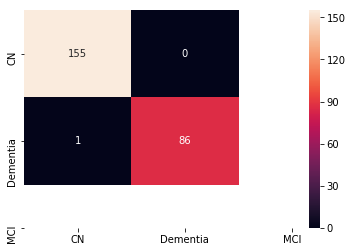

In [31]:
#Adaboost
ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

ab.n_estimators=200
ab.learning_rate=0.5
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))


print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

param_grid = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best_ab=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

2C). MCI vs Dementia

In [32]:
# Running the analyses for classifying (MCI) vs (Dementia)
# Removing cases with diagnostics of CN _ 0.
df4 = df2.loc[df2['DIAGNOSIS'] != 0].copy()
df4.describe()


,DIAGNOSIS,AGE,PTGENDER,PTEDUCAT,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,...,EcogSPLang.bl,EcogSPVisspat.bl,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl
count,1234.00000,1234.000000,1234.000000,1234.000000,1234.000000,1231.000000,1222.000000,1234.000000,1234.000000,1230.000000,...,642.000000,632.000000,635.000000,611.000000,626.00000,640.000000,846.000000,846.000000,846.000000,907.000000
mean,1.71799,73.575527,1.579417,15.699352,1.356564,12.951795,20.328682,6.379254,26.363857,31.060163,...,1.840720,1.649424,1.800630,1.919858,2.13525,1.967076,880.634634,308.615816,30.196017,1.199865
std,0.45016,7.737666,0.493853,2.887939,0.774236,6.728571,9.312680,2.660655,2.746025,11.118328,...,0.780533,0.777634,0.851316,0.922755,0.94551,0.746196,426.794158,142.239939,15.732930,0.156644
min,1.00000,54.400000,1.000000,4.000000,1.000000,1.000000,3.000000,0.000000,18.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,210.900000,79.000000,7.000000,0.697264
25%,1.00000,68.400000,1.000000,14.000000,1.000000,8.000000,13.670000,4.000000,25.000000,23.000000,...,1.222222,1.000000,1.000000,1.166667,1.25000,1.333333,557.825000,210.400000,18.850000,1.106445
50%,2.00000,74.000000,2.000000,16.000000,1.000000,11.670000,19.000000,7.000000,27.000000,29.000000,...,1.555556,1.285714,1.500000,1.666667,2.00000,1.773504,741.400000,281.600000,26.950000,1.205104
75%,2.00000,79.300000,2.000000,18.000000,1.000000,16.670000,26.000000,9.000000,29.000000,38.000000,...,2.333333,2.000000,2.400000,2.666667,2.75000,2.500000,1128.500000,379.250000,37.692500,1.303502
max,2.00000,91.400000,2.000000,20.000000,5.000000,42.670000,54.670000,10.000000,30.000000,68.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,3.948718,1701.000000,1301.000000,121.000000,1.707168


In [33]:
#Data stratification.
train,test = train_test_split(df4, test_size=0.25, random_state=0, stratify=df4['DIAGNOSIS']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[1:47]]
test_X  = test[test.columns[1:47]]

train_Y = train['DIAGNOSIS']
test_Y  = test['DIAGNOSIS']

# Data imputation 
#  replaced null values of train and test dataset with corresponding means in the train dataset.

meanofparameters = train_X.mean(skipna = True)
train_X          = train_X.fillna(meanofparameters)
test_X           = test_X.fillna(meanofparameters)
xticklabels      = ['Dementia','MCI'] 

acuracy on the 5 folds [0.85405405 0.83783784 0.87567568 0.89189189 0.91351351]
and their mean 0.8745945945945947
{4} acuracy on the 5 folds of CV [0.87567568 0.85405405 0.90810811 0.93513514 0.91351351]
and their mean 0.8972972972972973

 Results after grid search 

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(max_depth=4)
confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns 
 [[ 71  16]
 [ 15 207]]

 accuracy 0.8996763754045307

 precision 0.8255813953488372

 recall (sensitivity) 0.8160919540229885

 f1 0.8208092485549133

 accuracy from confusion matrix 0.8996763754045307

 precision from confusion matrix 0.9282511210762332

 recall (sensitivity) from confusion matrix 0.9324324324324325

 specificity from confusion matrix 0.8160919540229885


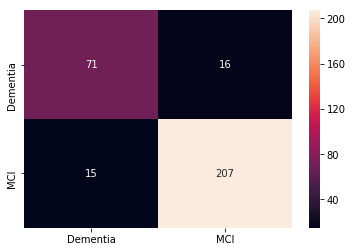

In [34]:
#Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

dt.max_depth = 4
scores = cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('{4} acuracy on the 5 folds of CV', scores)
print('and their mean', np.mean(scores))

print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

#Grid search
param_grid = [
     {'max_depth': [2, 3, 4, 5, 6, 7, 8]} ]

grid_search = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
best_dt=grid_search.best_estimator_
pred_Y=best_dt.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

# alternatively, they can also be computed from the confusion matrix, accoding to the lecture slides:

print( '\n accuracy from confusion matrix', (cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+ cm[1,1]) )
print( '\n precision from confusion matrix', (cm[1,1]) / (cm[0,1]+cm[1,1]) )
print( '\n recall (sensitivity) from confusion matrix', (cm[1,1]) / (cm[1,0]+cm[1,1]) )
print( '\n specificity from confusion matrix', (cm[0,0]) / (cm[0,1]+cm[0,0]) )
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.87567568 0.83243243 0.9027027  0.92432432 0.9027027 ]
and their mean 0.8875675675675675
for n_estimators 100;acuracy on the 5 folds [0.87567568 0.84864865 0.92432432 0.92432432 0.91351351]
and their mean 0.8972972972972972
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[ 73  14]
 [  9 213]]

 accuracy 0.9255663430420712

 precision 0.8902439024390244

 recall (sensitivity) 0.8390804597701149

 f1 0.8639053254437871


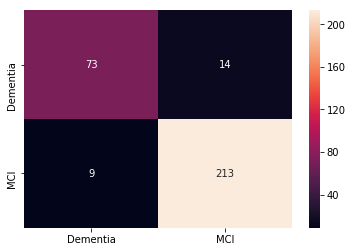

In [35]:
#Bagging.
bg=BaggingClassifier(DecisionTreeClassifier())
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.n_estimators=100 # by default 10 estimators (trees) are used
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators 100;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.fit(train_X, train_Y)
pred_Y=bg.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.91351351 0.85405405 0.91351351 0.91891892 0.93513514]
and their mean 0.9070270270270271
for max_features 7 and n_estimators 1000;acuracy on the 5 folds [0.90810811 0.84864865 0.91351351 0.92972973 0.92972973]
and their mean 0.9059459459459461

 Results after grid search 

best parameter values {'n_estimators': 600}
best estimator RandomForestClassifier(max_features=7, n_estimators=600)
0.9048648648648647 {'max_features': 'auto'}
0.9059459459459459 {'max_features': 'sqrt'}
0.9070270270270271 {'n_estimators': 600}
0.9070270270270271 {'n_estimators': 755}
0.904864864864865 {'n_estimators': 911}
0.9037837837837838 {'n_estimators': 1066}
0.9037837837837838 {'n_estimators': 1222}
0.9048648648648647 {'n_estimators': 1377}
0.9037837837837838 {'n_estimators': 1533}
0.9027027027027026 {'n_estimators': 1688}
0.9027027027027026 {'n_estimators': 1844}
0.9070270270270271 {'n_estimators': 2000}
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted val

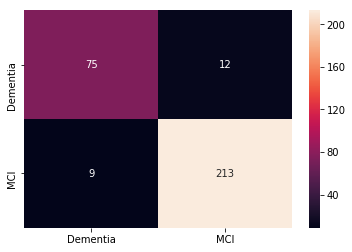

In [36]:
#RandomForests.
rf=RandomForestClassifier()
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

rf.max_features = 7
rf.n_estimators = 1000
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for max_features 7 and n_estimators 1000;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))
print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

#grid search.
param_grid = [
     {'max_features': ['auto','sqrt']},
     {'n_estimators': n_estimators} ]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)
    
best_rf=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)
cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.8972973  0.85405405 0.91351351 0.92432432 0.92972973]
and their mean 0.9037837837837838
for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds [0.9027027  0.85405405 0.91351351 0.92432432 0.92432432]
and their mean 0.9037837837837838

 Results after grid search 

best parameter values {'learning_rate': 0.1, 'n_estimators': 5}
best estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=5)
0.9005405405405404 {'learning_rate': 0.01, 'n_estimators': 5}
0.8994594594594595 {'learning_rate': 0.01, 'n_estimators': 10}
0.9059459459459459 {'learning_rate': 0.01, 'n_estimators': 50}
0.9059459459459459 {'learning_rate': 0.01, 'n_estimators': 100}
0.8854054054054054 {'learning_rate': 0.01, 'n_estimators': 500}
0.9037837837837838 {'learning_rate': 0.05, 'n_estimators': 5}
0.9059459459459459 {'learning_rate': 0.05, 'n_estimators': 10}
0.892972972972973 {'learning_rate': 0.05, 'n_estimato

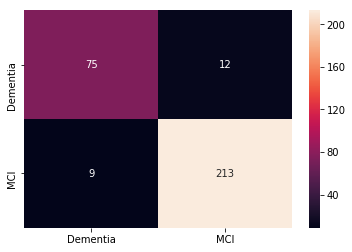

In [37]:
#Adaboost
ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

ab.n_estimators=200
ab.learning_rate=0.5
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))
print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

param_grid = {
     'n_estimators': [5, 10, 50, 100, 500],
     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best_ab=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

# 2d. distinguish CN vs. all.

In [38]:
# Distinguish (CN) vs (MCI and Dementia)
# Avoiding the entries with null values more than 50 percentage.
df10 = df1[filtereddata['ColName']].copy()

#Mapping features with categories to numerical. 

df10['PTGENDER'].replace({'Female': 1, 'Male': 2}, inplace= True)
df10['PTETHCAT'].replace({'Not Hisp/Latino': 1, 'Hisp/Latino': 2, 'Unknown':3}, inplace= True)
df10['PTMARRY'].replace({'Married': 1, 'Widowed': 2, 'Divorced':3, 'Never married':4, 'Unknown':5}, inplace= True)
df10['PTRACCAT'].replace({'White': 1, 'More than one': 2, 'Black':3, 'Asian':4, 'Unknown':5, 'Hawaiian/Other PI':6,'Am Indian/Alaskan':7}, inplace= True)

df10['DIAGNOSIS'].replace({'CN': 0, 'Dementia': 1, 'MCI':1}, inplace= True)

# Removed two columns from the analysis; due to the inference from statistical analysis.
del df10['PTETHCAT']
del df10['PTRACCAT']



xticklabels = ['CN','Others']

#Data stratification.
train,test = train_test_split(df10, test_size=0.25, random_state=0, stratify=df10['DIAGNOSIS']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[1:47]]
test_X  = test[test.columns[1:47]]

train_Y = train['DIAGNOSIS']
test_Y  = test['DIAGNOSIS']

# Data imputation 
#  replaced null values of train and test dataset with corresponding means in the train dataset.

meanofparameters = train_X.mean(skipna = True)
train_X          = train_X.fillna(meanofparameters)
test_X           = test_X.fillna(meanofparameters)


acuracy on the 5 folds [0.92446043 0.91366906 0.92446043 0.90613718 0.92418773]
and their mean 0.9185829675609692
{4} acuracy on the 5 folds of CV [0.93165468 0.92805755 0.94604317 0.94223827 0.94584838]
and their mean 0.9387684076565461

 Results after grid search 

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(max_depth=4)
confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns 
 [[132  22]
 [  4 305]]

 accuracy 0.9438444924406048

 precision 0.9438444924406048

 recall (sensitivity) 0.9438444924406048

 f1 0.9438444924406048

 accuracy from confusion matrix 0.9438444924406048

 precision from confusion matrix 0.9327217125382263

 recall (sensitivity) from confusion matrix 0.9870550161812298

 specificity from confusion matrix 0.8571428571428571


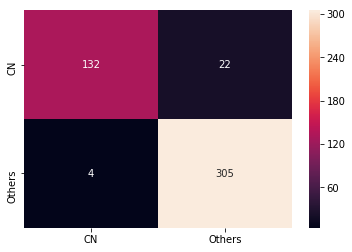

In [39]:
#Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

dt.max_depth = 4
scores = cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=5)
print('{4} acuracy on the 5 folds of CV', scores)
print('and their mean', np.mean(scores))

print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

#Grid search
param_grid = [
     {'max_depth': [2, 3, 4, 5, 6, 7, 8]} ]

grid_search = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
best_dt=grid_search.best_estimator_
pred_Y=best_dt.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on raws, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y,average='micro'))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y,average='micro'))
print('\n f1', f1_score(test_Y, pred_Y,average='micro'))

# alternatively, they can also be computed from the confusion matrix, accoding to the lecture slides:

print( '\n accuracy from confusion matrix', (cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+ cm[1,1]) )
print( '\n precision from confusion matrix', (cm[1,1]) / (cm[0,1]+cm[1,1]) )
print( '\n recall (sensitivity) from confusion matrix', (cm[1,1]) / (cm[1,0]+cm[1,1]) )
print( '\n specificity from confusion matrix', (cm[0,0]) / (cm[0,1]+cm[0,0]) )
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.9352518  0.9352518  0.95323741 0.93140794 0.93501805]
and their mean 0.9380333999948055
for n_estimators 100;acuracy on the 5 folds [0.94244604 0.94244604 0.94964029 0.92418773 0.94223827]
and their mean 0.9401916733761005
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns 
 [[135  19]
 [  9 300]]

 accuracy 0.9395248380129589

 precision 0.9404388714733543

 recall (sensitivity) 0.970873786407767

 f1 0.9554140127388535


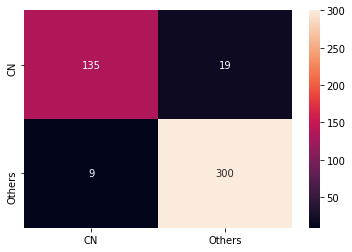

In [40]:
#Bagging.
bg=BaggingClassifier(DecisionTreeClassifier())
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.n_estimators=100 # by default 10 estimators (trees) are used
scores=cross_val_score(bg, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators 100;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

bg.fit(train_X, train_Y)
pred_Y=bg.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.92805755 0.91007194 0.9352518  0.93501805 0.9566787 ]
and their mean 0.9330156091733113
for max_features 7 and n_estimators 1000;acuracy on the 5 folds [0.94244604 0.91007194 0.9352518  0.93140794 0.94584838]
and their mean 0.9330052203724385
best parameter values {'n_estimators': 911}
best estimator RandomForestClassifier(max_features=7, n_estimators=911)

 Results after grid search 

0.9315663714515752 {'max_features': 'auto'}
0.9322857959120068 {'max_features': 'sqrt'}
0.932288393112225 {'n_estimators': 600}
0.9322831987117887 {'n_estimators': 755}
0.9351660909539516 {'n_estimators': 911}
0.9351608965535153 {'n_estimators': 1066}
0.933722047632652 {'n_estimators': 1222}
0.9351634937537334 {'n_estimators': 1377}
0.9344414720930836 {'n_estimators': 1533}
0.9330026231722203 {'n_estimators': 1688}
0.9337246448328701 {'n_estimators': 1844}
0.9330000259720022 {'n_estimators': 2000}
confusion matrix,  classes order is 0 and 1, actual values on rows, predicted valu

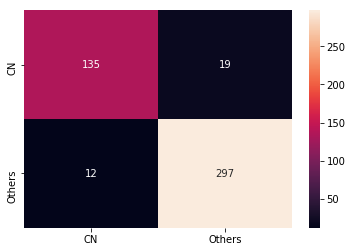

In [41]:
#RandomForests.
rf=RandomForestClassifier()
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

rf.max_features = 7
rf.n_estimators = 1000
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for max_features 7 and n_estimators 1000;acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

#grid search.
param_grid = [
     {'max_features': ['auto','sqrt']},
     {'n_estimators': n_estimators} ]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best_rf=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)
cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))
sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')

acuracy on the 5 folds [0.94604317 0.91007194 0.93884892 0.93140794 0.94223827]
and their mean 0.933722047632652
for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds [0.94604317 0.91007194 0.93884892 0.93501805 0.94945848]
and their mean 0.9358881126146015

 Results after grid search 

best parameter values {'learning_rate': 0.05, 'n_estimators': 80}
best estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.05, n_estimators=80)
0.9229228891255227 {'learning_rate': 0.01, 'n_estimators': 10}
0.9358777238137288 {'learning_rate': 0.01, 'n_estimators': 20}
0.9373243643352465 {'learning_rate': 0.01, 'n_estimators': 30}
0.9387684076565461 {'learning_rate': 0.01, 'n_estimators': 40}
0.9387710048567645 {'learning_rate': 0.01, 'n_estimators': 50}
0.9402072565774094 {'learning_rate': 0.01, 'n_estimators': 60}
0.9423681271589226 {'learning_rate': 0.01, 'n_estimators': 70}
0.9423681271589226 {'learning_rate': 0.01, 'n_esti

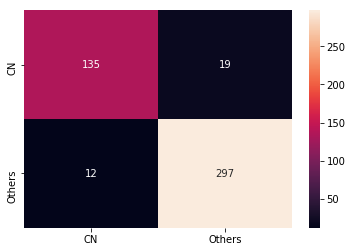

In [42]:
#Adaboost
ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

ab.n_estimators=200
ab.learning_rate=0.5
scores=cross_val_score(rf, train_X, train_Y, scoring='accuracy', cv=5)
print('for n_estimators=200 and learning rate 0.5, acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))


print('\033[1m' + '\n Results after grid search \n' + '\033[0m')

param_grid = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best_ab=grid_search.best_estimator_
pred_Y=best_rf.predict(test_X)

cm=confusion_matrix(test_Y, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

sns.heatmap(cm,xticklabels =xticklabels,yticklabels =xticklabels,annot=True,fmt='d')